## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


### Part 1: Understanding Product Categories



**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?


In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

%matplotlib inline
pd.set_option('display.max_columns', None)

In [52]:
amz = pd.read_csv("amz_uk_price_prediction_dataset.csv")


In [53]:
amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [54]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [55]:
amz['category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2443651 entries, 0 to 2443650
Series name: category
Non-Null Count    Dtype 
--------------    ----- 
2443651 non-null  object
dtypes: object(1)
memory usage: 18.6+ MB


In [56]:
frequency_table = amz['category'].value_counts()
frequency_table
#Frequency table created and displayed

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [57]:
frequency_table.head()
#Top 5 product categories in category column displayed 

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

C:\Users\jgest\AppData\Local\Temp\ipykernel_14456\1484840031.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


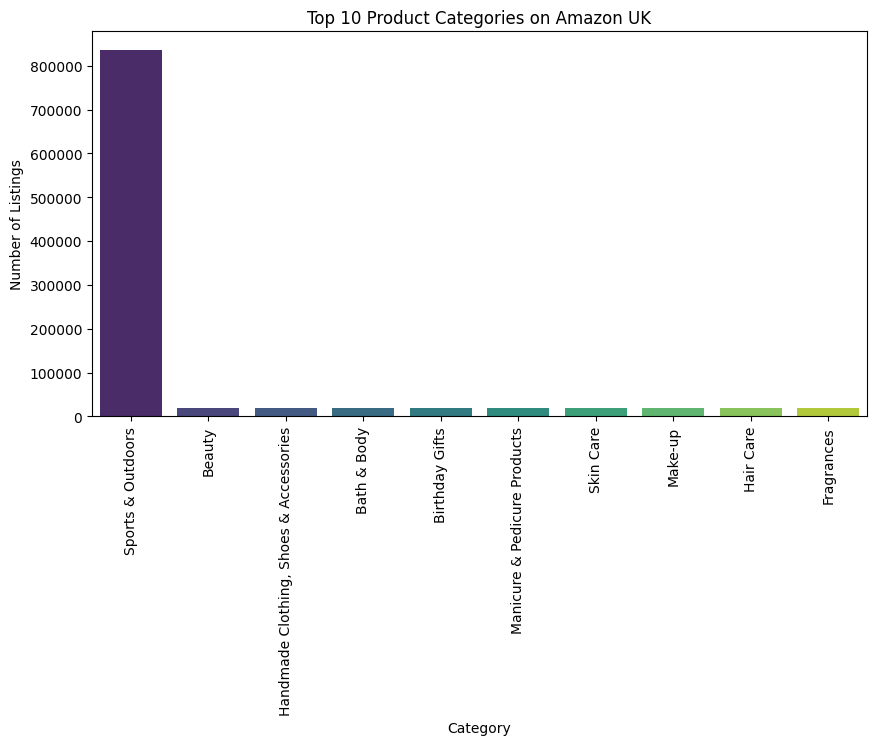

In [58]:

frequency_table = amz['category'].value_counts().reset_index()
frequency_table.columns = ['category', 'count']


top10 = frequency_table.head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    data=top10,
    x='category',
    y='count',
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Top 10 Product Categories on Amazon UK')
plt.xlabel('Category')
plt.ylabel('Number of Listings')
plt.show()


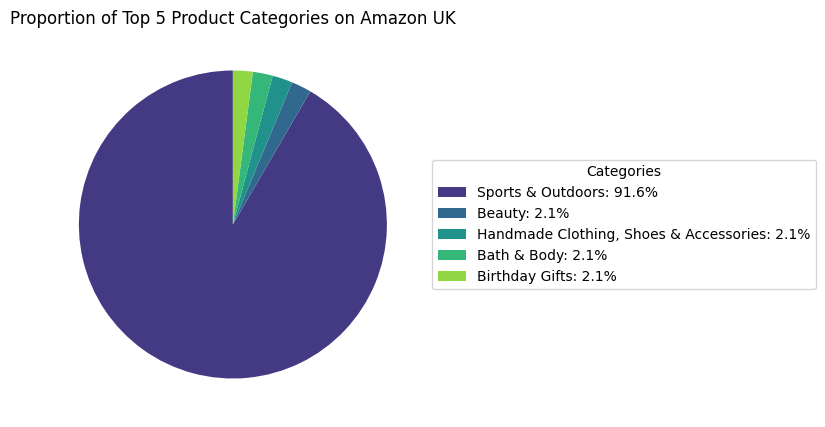

In [59]:

top5 = frequency_table.head(5)

plt.figure(figsize=(10,5))
wedges, texts = plt.pie(
    top5['count'],
    startangle=90,
    colors=sns.color_palette('viridis', n_colors=5)
)

# clear legend with labels and percentages
plt.legend(
    wedges,
    [f"{cat}: {count / top5['count'].sum():.1%}" for cat, count in zip(top5['category'], top5['count'])],
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # move legend outside the chart
)

plt.title('Proportion of Top 5 Product Categories on Amazon UK')
plt.show()

Insights:
As we can clearly see in the the charts Sports & Outdors product category clearly dominates the listings.

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?



1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [60]:
amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [61]:
amz['price'].isna().sum() #cheking for na values

0

In [62]:
(amz['price'] <= 0).sum() #checking fot 0 or negative values

20

In [63]:
amz[amz['price'] <= 0] # displaying the 20 values with a price of 0 or less

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
342871,367018,B07TYXW54L,Exercises with Resistance Loop Bands: 40+ Exer...,4.1,94,0.0,False,0,Sports & Outdoors
546823,589599,B003WL4O38,Operation Mincemeat: The True Spy Story that C...,4.5,5795,0.0,False,0,PC & Video Games
547321,590132,B005KKRRVK,Kensuke’s Kingdom,4.7,4565,0.0,False,0,PC & Video Games
547507,590332,B09WRXGQZL,"Faith, Hope and Carnage",4.7,546,0.0,False,0,PC & Video Games
794353,855945,B07T7L39TN,Never Split the Difference: Negotiating as if ...,4.6,39112,0.0,True,0,School & Educational Supplies
830446,905582,B00E3SYBWS,"Go for the Gold, Atalanta! (Myth-O-Mania Book 8)",4.7,190,0.0,False,0,Games & Game Accessories
830795,905932,B0BJQQZ79H,Battle of the Fang: Space Marine Battles: Warh...,4.6,166,0.0,False,0,Games & Game Accessories
833556,908772,B07YGP8442,100 Years of Leeds United,4.8,1349,0.0,False,0,Games & Game Accessories
836136,911439,B0BLFPRMZH,"Dungeons & Guardians: Battleborne, Book III",4.7,2421,0.0,False,0,Games & Game Accessories
1025782,1134431,B0BL8LQCHZ,"4 in 1 Bundle Off the Grid Survival Book, Prep...",4.3,5,0.0,False,0,Sports & Outdoors


In [64]:
amz = amz[amz['price'] > 0] # droping the 20 0 values since a price of 0 doesn't make sense.

In [65]:
round(amz['price'].describe(),2) # Displaying some metadata for the price numerical column

count    2443631.00
mean          89.24
std          345.61
min            0.01
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [66]:
mean_price = amz['price'].mean()
median_price = amz['price'].median()
mode_price = amz['price'].mode()[0]

print(f"Mean price: {mean_price:.2f}")
print(f"Median price: {median_price:.2f}")
print(f"Mode price: {mode_price:.2f}")

# mean and median can also be found in the describe method.

Mean price: 89.24
Median price: 19.09
Mode price: 9.99


Insights:

The average product price 89.24 is much higher than the median 19.09 price, showing a strong positive skew in the data.
This means that most products are relatively inexpensive, but a few very high-priced items pull the average upward.
The median price 19.09 represents the typical product price that most customers encounter.
The mode price 9.99 is the most common price point across listings.


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?


In [67]:
round(amz['price'].describe(),2)

count    2443631.00
mean          89.24
std          345.61
min            0.01
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [68]:
round(amz['price'].var(),2)

119446.4

In [69]:
range= (amz['price'].max())- (amz['price'].min())
range

99999.99

In [70]:
# IQR = Q3 - Q1

Q1 = amz['price'].quantile(0.25)
Q3 = amz['price'].quantile(0.75)

IQR = Q3 - Q1

IQR

36.0

In [71]:
round(amz['price'].skew(),2)

27.49

Insights:

For product price:
The variance is 119445.49
The standard deviation is 345.61
The range is 100000
The IQR is 36

High Variance and Standard Deviation. These values indicate that product prices vary dramatically — from very low-cost items to high-end products.
This huge range reinforces that a few outlier products are priced far higher than most items.
Small IQR. Despite the wide range, the majority of products are clustered in a narrow low-price band.

It is positive-skewed or right-skew. This means that the mean is higher than the mode and the distribution has a long right tail. Most of the data (product prices) are clustered on the lower end And few very large values (expensive products) stretch the tail of the distribution to the right.


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

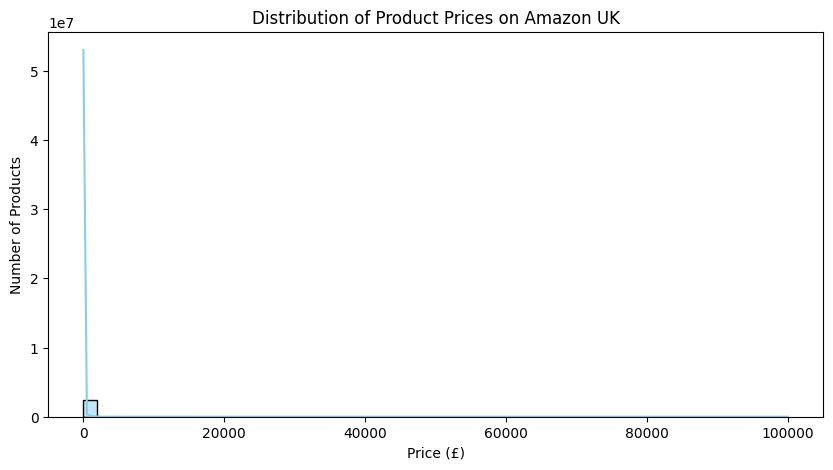

In [72]:
plt.figure(figsize=(10,5))
sns.histplot(amz['price'], bins=50, kde=True, color='skyblue')

plt.title("Distribution of Product Prices on Amazon UK")
plt.xlabel("Price (£)")
plt.ylabel("Number of Products")
plt.show()

Insights:
A few very high-priced products push the x-axis scale far to the right.
So all the cheaper products (most of the data) are compressed together on the left side.
To fix this we could excludes outliers and shows where most prices fall.

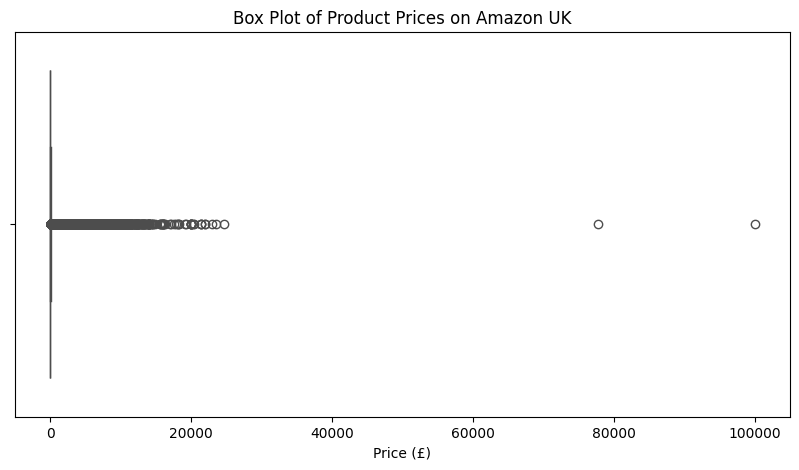

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price', data=amz, color='orange')

plt.title("Box Plot of Product Prices on Amazon UK")
plt.xlabel("Price (£)")
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?



1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?


In [74]:
amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [75]:
amz_rated = amz[amz['reviews'] > 0] # removing the data with no reviews. 

In [76]:
round(amz_rated['stars'].describe(),2)

count    1217990.00
mean           4.32
std            0.56
min            1.00
25%            4.10
50%            4.40
75%            4.60
max            5.00
Name: stars, dtype: float64

In [77]:
amz_rated['stars'].isna().sum()

0

In [78]:
mode_ratings = amz_rated['stars'].mode()
mode_ratings

0    4.5
Name: stars, dtype: float64

Insights:
The average rating is 4.32 stars out of 5. Quite high!
Mode is 4.5 star rating. The most frequent rating is 4.5 stars, showing that a large share of listings consistently receive very good reviews. 
4.4 star rating stands in the 50% of the range.
Alltoghether, reflects a high and stable customer satisfaction.


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?


In [79]:
var_stars = round(amz_rated['stars'].var(),2)
var_stars


0.31

In [80]:
Q1stars = amz_rated['stars'].quantile(0.25)
Q3stars = amz_rated['stars'].quantile(0.75)
IQRstars = Q3stars - Q1stars
IQRstars

0.5

Insights:
Standard deviation is 0.56 meaning that most ratings are within half a star of the average.
Variance is 0.31 This reinforces that most products are rated highly and similarly.
IQR is 0.5 This shows that the middle 50% of all ratings are tightly packed so there isn’t much variability.


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [81]:
amz_rated['stars'].skew()

-2.3795622040753632

In [82]:
from scipy.stats import  kurtosis

kurt = kurtosis(amz_rated['stars'])

kurt


9.781853392429765


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

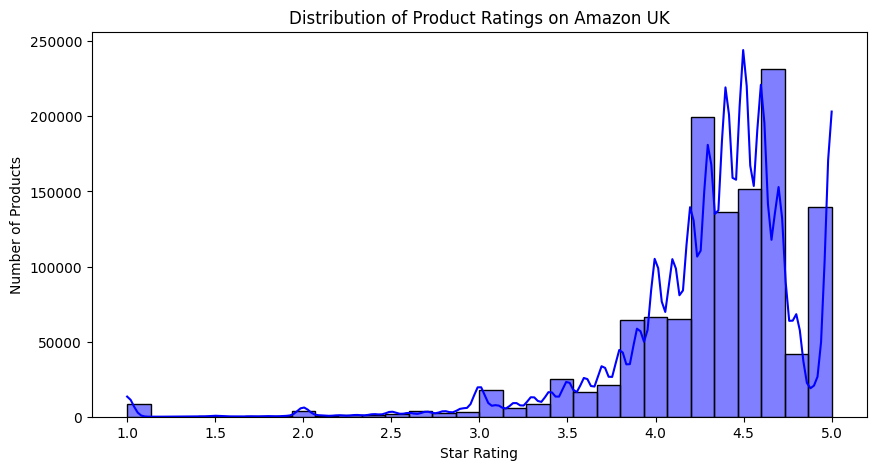

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(
    data=amz_rated,
    bins= 30,
    x='stars',
    kde=True,
    color='blue'
)

plt.title("Distribution of Product Ratings on Amazon UK")
plt.xlabel("Star Rating")
plt.ylabel("Number of Products")
plt.show()

Insights:
The histogram of product ratings shows that most ratings fall between 4 and 5 stars, with a clear peak around 4.5 stars — the most common rating value.
The distribution is left-skewed, indicating that customers tend to give high ratings rather than low ones.
This confirms that Amazon UK products are generally well received, and customer satisfaction levels are consistently strong.